![Stotober](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRt7m3E67ogwWOfRoEU9EtJsnZ80bWI0j2FPQ&s)

# BREATHE AGAIN

### Project Overview

This is a classification problem , whose main aim is to classify whether or not someone is a smoker or not using bio-signals. The project will focus in on the main tell signs that someone is a smoker and how you to help a smoker quit.

## Business Understanding

Victorious Living is a non profit Christian organization which is in the business of helping as many people as possible find abundant life in Christ and live Victoriously! As Jesus said in John 10 : 10 ,"The thief does not come except to kill, to steal and to destroy, but I have come that they may have life and that they may have it more abundantly. Too many people are stuck in the menace of smoking,and many die as a result of the diseases caused by smoking.From this project, Victorious Living aims to identify the major health risks that are brought about by smoking and thereafter use this data to sensitize people against smoking in the hope that more people will be able to breathe again and live Victorious Lives in Christ.

### Objectives
1. Identify the effects of smoking on the body systems. 

2. Identify the distribution of smokers by age.

3. Identify the best classification model to use for accurately precting the smoking status of an individual based on bio-signals.

## Data Understanding



In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


pd.options.display.float_format = '{:,.2f}'.format


In [3]:
# A function to show unique values per column. 

def custom_describe(df): 
    table = pd.DataFrame()
    table['Data Type'] = df.dtypes
    table['Unique Values'] = df.nunique()
    return table



In [4]:
# Read the data

df_train = pd.read_csv("data/Smoker Status Dataset.csv")
print(f"SmokerData Dataframe")
display(df_train.head())

train_data_description = custom_describe(df_train)
train_data_description

SmokerData Dataframe


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.00,0.50,0.60,1,1,135,...,40,75,16.50,1,1.00,22,25,27,0,1
1,1,70,165,65,89.00,0.60,0.70,2,2,146,...,57,126,16.20,1,1.10,27,23,37,1,0
2,2,20,170,75,81.00,0.40,0.50,1,1,118,...,45,93,17.40,1,0.80,27,31,53,0,1
3,3,35,180,95,105.00,1.50,1.20,1,1,131,...,38,102,15.90,1,1.00,20,27,30,1,0
4,4,30,165,60,80.50,1.50,1.00,1,1,121,...,44,93,15.40,1,0.80,19,13,17,0,1


,Data Type,Unique Values
id,int64,159256
age,int64,18
height(cm),int64,14
weight(kg),int64,28
waist(cm),float64,531
eyesight(left),float64,20
eyesight(right),float64,17
hearing(left),int64,2
hearing(right),int64,2
systolic,int64,112


As can be seen above, we have over 159,000 rows with 23 features columns and 1 target column. 
- `id` : Id of the current row.
- `age`: How old the individual is.
- `height`: Height in centimeters.
- `weight`: Weight in kilograms.
- `waist(cm)`: Waist circumference in centimeters.
- `eyesight(left)`: Eyesight in diopters(D).
- `eyesight(left)`: Eyesight in diopters(D).
- `hearing(left)` : 1 for normal hearing/2 for hearing imparment.
- `hearing(right)` : 1 for normal hearing/2 for hearing imparment.
- `systolic` : blood pressure in mmhg(millimeters of mercury). 90-120 (Normal range)
- `relaxation` : blood pressure in mmhg(millimeters of mercury).
- `fasting blood sugar` 
- `Cholesterol` : total
- `triglyceride` : 
- `HDL`: High Density Liprotein (cholesterol type)
- `LDL` : Low Denstity Lipoprotein (cholesterol type)
- `hemoglobin` :
- `Urine protein` 
- `serum creatinine`:
- `AST` : aspartate aminotransferase
- `ALT` : alanine aminotransferase
- `Gtp` 
- `dental carries` 
- `smoking` : 0 for non-smokers / 1 for smokers

#### A pie chart to visualize the difference in the distribution of Smokers and Non-Smokers

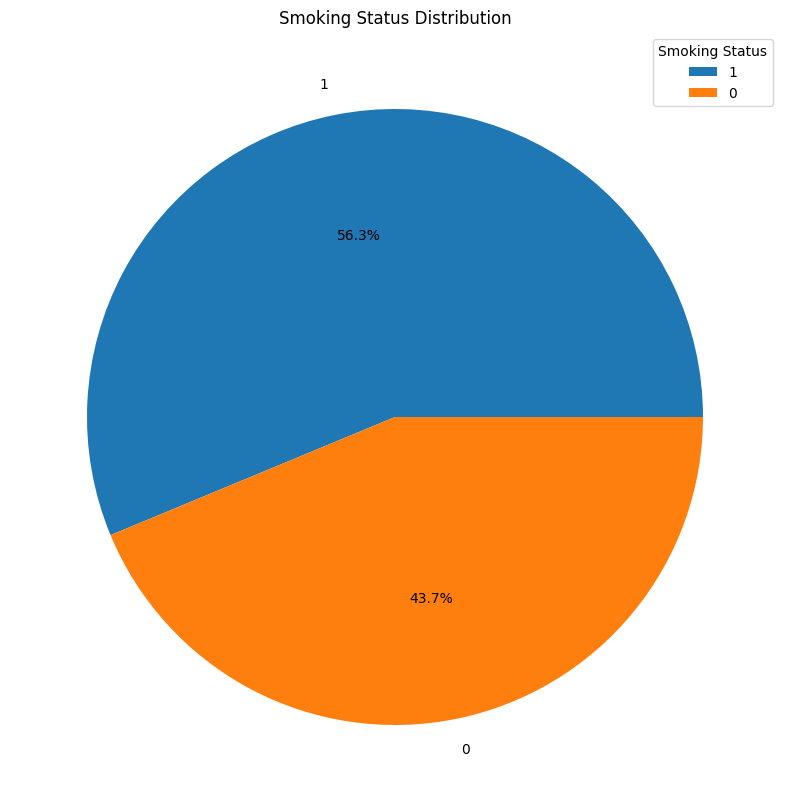

In [5]:

plt.figure(figsize = (10,10))
plt.pie(df_train['smoking'].value_counts(), labels=df_train['smoking'].unique(), autopct = '%1.1f%%')
plt.title('Smoking Status Distribution')
plt.legend(title='Smoking Status', loc='best')
plt.show()


The ratio of non-smokers to smokers in the above dataset is 56.3% to 43.7%

## Data Cleaning & Preprocessing

In [6]:
# Size of the dataset
print(f"Train_data Shape: {df_train.shape}")


Train_data Shape: (159256, 24)


##### Drop the id column

In [7]:
df_train.drop("id", axis=1, inplace=True)

##### Check for NaN values

In [8]:
df_train.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

There are no missing values in this dataset, therefore, no imputation strategies are needed.

##### Check for duplicates

In [9]:
df_train.duplicated().sum()

0

## Feature Engineering

In [10]:
# BMI(Body Mass Index)
df_train["BMI"] = df_train["weight(kg)"]/(df_train["height(cm)"]/100) ** 2

##### Check for column types(continous or categorical)

In [11]:
# Numeric Columns
num_cols = [col for col in df_train.columns if (df_train[col].dtype in ["int64","float64"]) & (df_train[col].nunique()>10)]
num_cols

['age',
 'height(cm)',
 'weight(kg)',
 'waist(cm)',
 'eyesight(left)',
 'eyesight(right)',
 'systolic',
 'relaxation',
 'fasting blood sugar',
 'Cholesterol',
 'triglyceride',
 'HDL',
 'LDL',
 'hemoglobin',
 'serum creatinine',
 'AST',
 'ALT',
 'Gtp',
 'BMI']

In [12]:
 # Categorical Columns
cat_cols = [col for col in df_train.columns if df_train[col].nunique()<10]
cat_cols

['hearing(left)',
 'hearing(right)',
 'Urine protein',
 'dental caries',
 'smoking']

## Exploratory Data Analysis

#### Categorical 

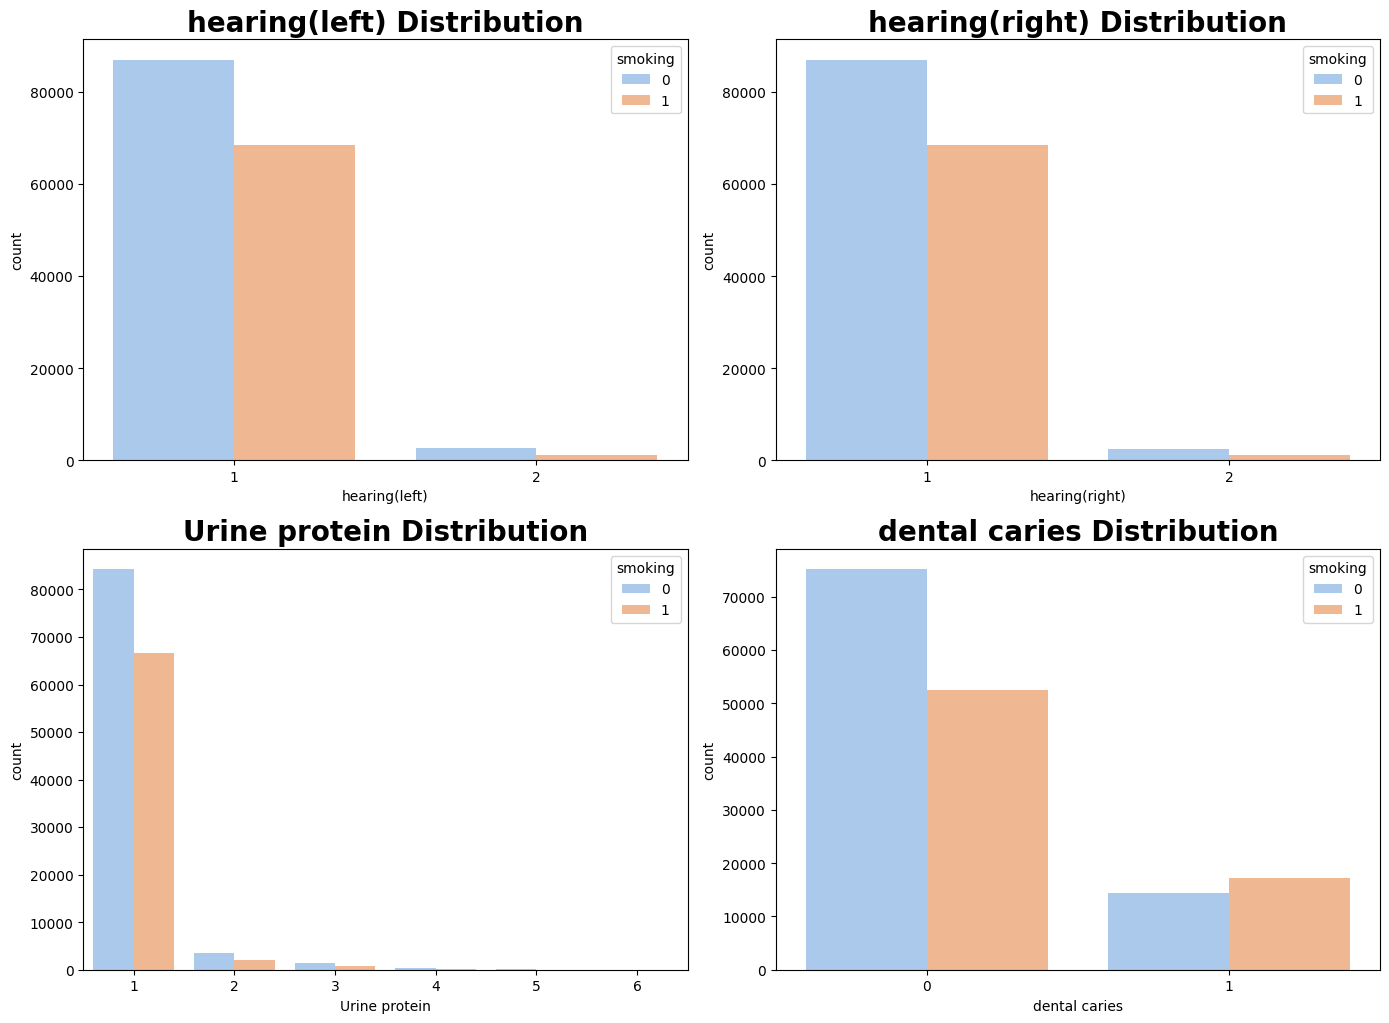

In [13]:
# Visualize distributions of categorical features
plt.figure(figsize=(14,len(cat_cols)*3))
for idx,column in enumerate (cat_cols[:-1]):
    plt.subplot(len(cat_cols)//2+1,2,idx+1)
    sns.countplot(hue="smoking", x=column , data=df_train , palette="pastel")
    plt.title(f"{column} Distribution" , weight="bold", fontsize=20)
    plt.tight_layout()

#### Numeric

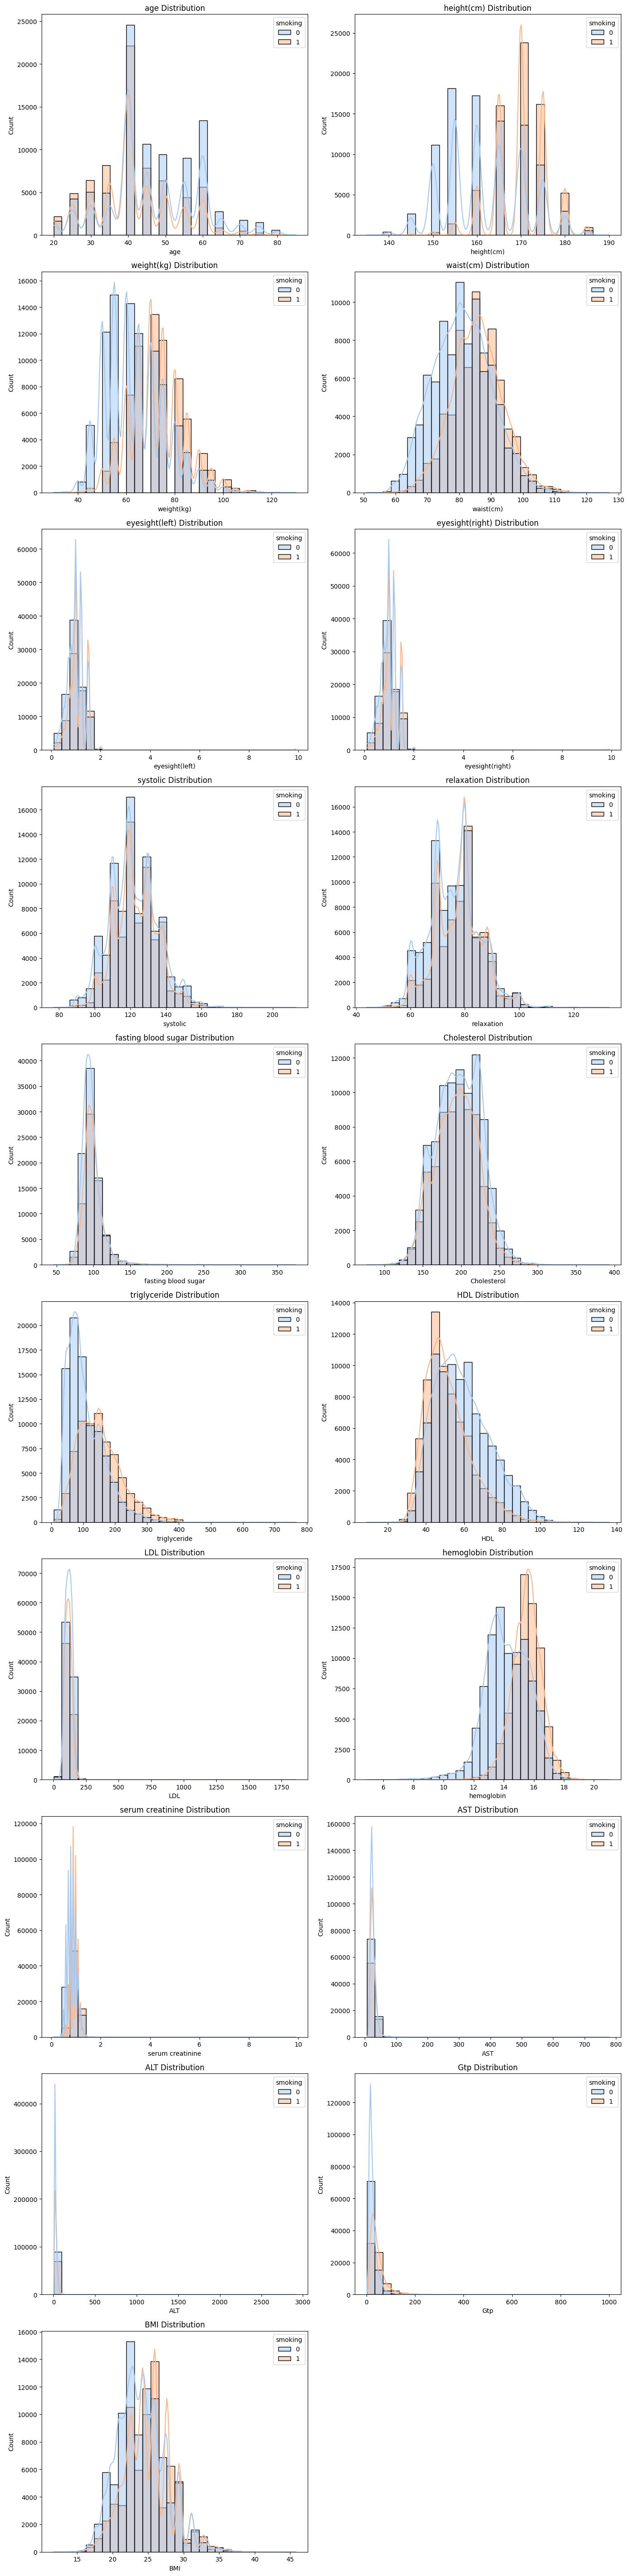

In [14]:
# Visualize the distribution of numeric features using histograms
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)  # this calculation ensures that you create enough rows to fit all your subplots even if the number of categorical columns is odd.
    sns.histplot(x=column, hue="smoking", data = df_train, bins=30, kde=True, palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

In [15]:
# Find the distribution of smokers to non-smokers by age.
smokers_df = df_train[df_train['smoking'] == 1]

# Group by age to see the distribution of the smokers by age
smokers_by_age = smokers_df.groupby('age').size().reset_index(name='count')

smokers_by_age

,age,count
0,20,2177
1,25,4879
2,30,6429
3,35,8167
4,40,22107
5,45,7843
6,50,6346
7,55,4422
8,58,2
9,60,5625


##### Visualize the distribution of smokers by age

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_40316\3874294647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='count', data=smokers_by_age, palette='viridis')


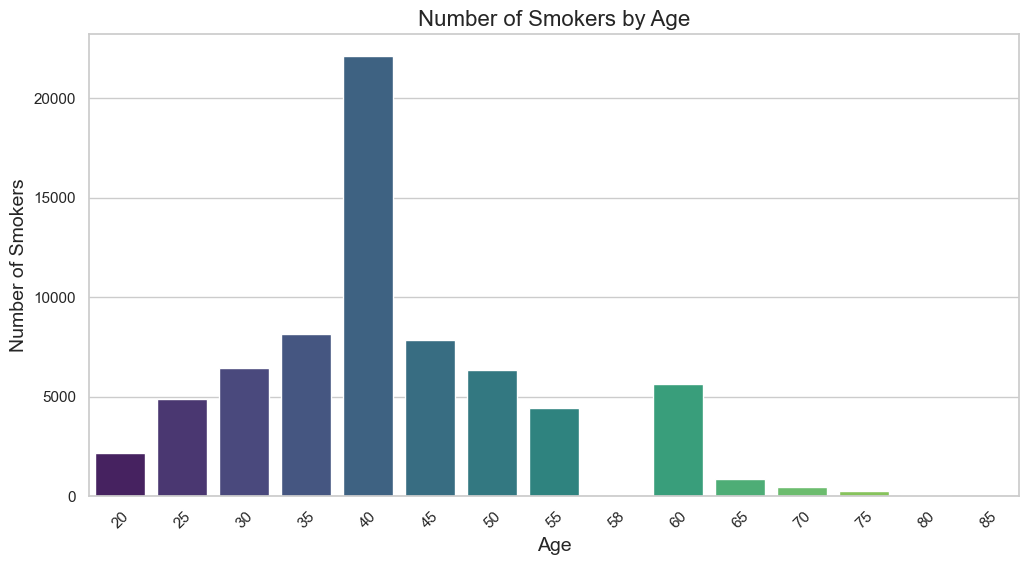

In [16]:
# Set the style of the visualization
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='count', data=smokers_by_age, palette='viridis')

# Add titles and labels
plt.title('Number of Smokers by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Smokers', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels if needed

# Show the plot
plt.show()

##### Check for class imbalance in the target variable

smoking
0    89603
1    69653
Name: count, dtype: int64


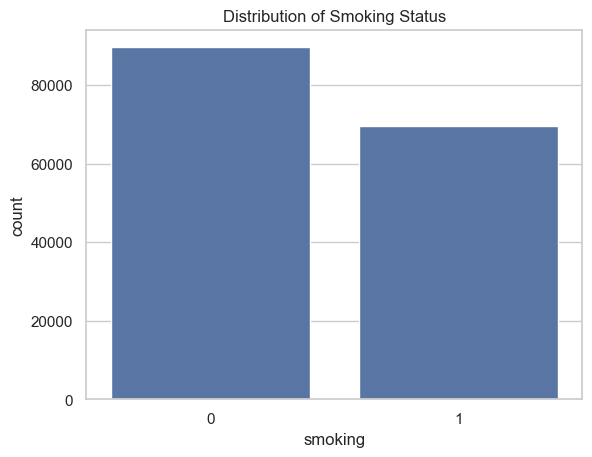

In [17]:
print(df_train['smoking'].value_counts())
sns.countplot(x='smoking', data=df_train)
plt.title("Distribution of Smoking Status")
plt.show()

In this dataset, those who do not smoke are more than those who smoke.

##### Check for correlation among features

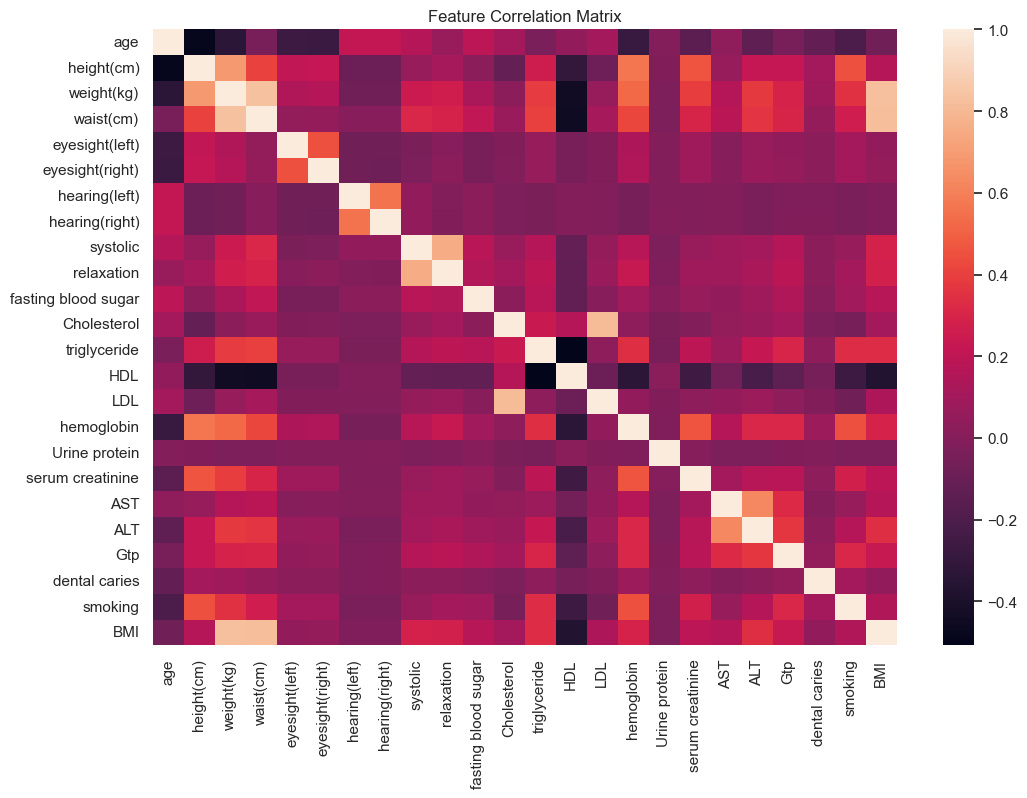

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.select_dtypes("number").corr());
plt.title('Feature Correlation Matrix')
plt.show()

The features with strong correlation include :- Cholestrol and LDL(Also known Low-Density-Lipoprotein bad cholesterol) have a high correlation to smoking.

## Modelling

##### Separate features and target variable

In [19]:
X = df_train.drop('smoking',axis=1)
y = df_train['smoking']

##### Split the data into testing and training data. 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42, stratify=y)

##### Build a logistic regression model 

In [21]:
log_reg_classifier = LogisticRegression(random_state=42)


##### Build a Random Forest Model

In [22]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

##### Fit the data

In [23]:
# Using Logistic Regression Model
log_reg_classifier.fit(X_train,y_train)


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [24]:
# Using Random Forest Model
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

##### Predict on the test set

In [25]:
# Using the logistic regression classifier
log_reg_y_pred = log_reg_classifier.predict(X_test)

In [26]:
# Using the Random Forest Classifier
rf_y_pred = rf_classifier.predict(X_test)

##### Calculate the accuracy

In [27]:
lr_accuracy = accuracy_score(y_test,log_reg_y_pred)
print(f"Logistic Regression Model Accuracy: {lr_accuracy:.2f}")
rf_accuracy = accuracy_score(y_test,rf_y_pred )
print(f"Random Forest Model Accuracy Score : {rf_accuracy:.4f}")

Logistic Regression Model Accuracy: 0.74
Random Forest Model Accuracy Score : 0.7709


In [28]:
# Generate a Linear Regression Prediction Confusion Matrix
lr_conf_matrix = confusion_matrix(y_test, log_reg_y_pred)
print("Logistic Regression Results Confusion Matrix:")
print(lr_conf_matrix)

Logistic Regression Results Confusion Matrix:
[[34022 10780]
 [ 9622 25204]]


In [29]:
# Generate a Random Forest Prediction Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
print("Random Forest Results Confusion Matrix:")
print(rf_conf_matrix)

Random Forest Results Confusion Matrix:
[[33458 11344]
 [ 6899 27927]]


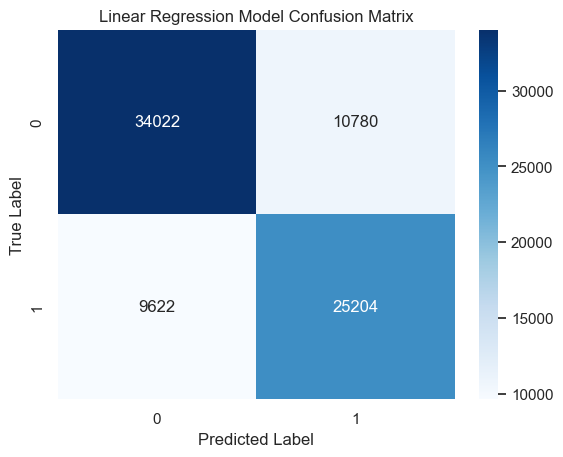

In [34]:
# Visualize Linear Regression Confusion Matrix
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Linear Regression Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

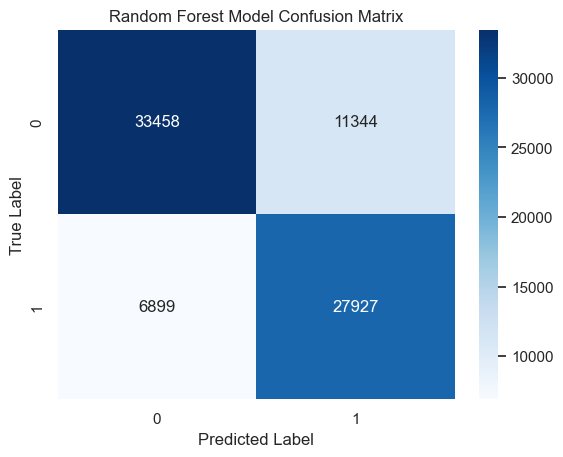

In [35]:
# Visualize Random Forest Confusion Matrix
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Findings

##### Print classification report for detailed metrics

In [32]:
print('Linear Regression Model Classification Report:')
print(classification_report(y_test, log_reg_y_pred))

Linear Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     44802
           1       0.70      0.72      0.71     34826

    accuracy                           0.74     79628
   macro avg       0.74      0.74      0.74     79628
weighted avg       0.74      0.74      0.74     79628



In [33]:
print('Random Forest Model Classification Report:')
print(classification_report(y_test, rf_y_pred))

Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79     44802
           1       0.71      0.80      0.75     34826

    accuracy                           0.77     79628
   macro avg       0.77      0.77      0.77     79628
weighted avg       0.78      0.77      0.77     79628



1. Findings from the EDA
- Cholestrol and LDL(Low Density Lipoprotein aka bad cholestrol) are highly correlated.

     Reseach Findings.
  Smoking is closely linked to elevated levels of bad cholestrol(LDL). When one smokes, it triggers a series of biochemical processes that negatively affect cholestrol levels and cardiovascular health.

 Below are some effects of Smocking to the body. 
 1. Oxidative Stress: Smoking increases oxidative stress which damages the walls of blood vessels. The damage encourages the accumuulation of LDL cholestrol on the arterial walls, contributing to an increased risk of
 LDL buildup. 

 2. Decrease in HDL Cholesterol: Smoking reduces levels of high-density lipoprotein(HDL) also known as "good" cholesterol. HDL helps remove LDL from the bloodstream, so lower  HDL levels leads to increased risk of LDL buildup. 

 3. Impaired Lipid Metabolism : Smoking affects how the body metabolizes fats, leading to an increase in the levels of triglycerides, another type of fat that contributes to heart disease. This can in turn lead to the increase in LDL Cholesterol levels.

 4. Inflammation : Smoking causes inflamation which makes LDL cholesterol more likely to become oxidized - a form that is a particularly harmful and more likely to contribute to atherosclerosis, a condition characterised by hardened and narrowed arteries. 


 > U.S. Department of Health and Human Services. (2020). Smoking and Cardiovascular Disease: A Report of the Surgeon General. Washington, DC: U.S. Government Printing Office. Available at https://www.cdc.gov/tobacco/data_statistics/sgr/2020-smoking-cardiovascular-disease/index.html.



 2. Distribution of smokers to non-smokers by age.
 - The largest population of smokers are in their mid-years i.e they are around the age of 40.


 3. Classification model to use for predicting of an individuals smoking status. 
 - The Random Forest Classifier does a better job at predicting the smoking status of an individual when it is fed with bio-status data.

## Recommendations


Below are the recommendations that Victorious living should take into consideration in their drive to sensitize people against smoking. 
1. In their anti-smoking sensitisation drives, Victorious living should point out to smokers the negative effects that smoking has on their health , emphasizing the 
fact that smoking is a major cause of lung cancer and other respiratory diseases. They should also highlight the fact that smoking causes an increase in bad cholestrol in the body , which increases the risks of heart diseases caused by accumulation of cholestrol in the arterial walls. 

2. Victorious Living should focus their anti-smoking sensitization drives to smokers over the age of 40 as this age set has the highest population of smokers. The people 
over 40 can then mentor those who are younger in age to break free from smoking. 

3. Victorious Living should use the random forest classifier when predicting the smoking status of individuals based on bio-data as it is a better classifier compared to 
   the logistic regression classifier.